#### Hitmap
https://en.wikipedia.org/wiki/Heat_map
- the chart that shows the connection of vlaues with color
- how the phenomenon is clustered or varies over space

In [9]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
# flight_dframe = sns.load_dataset('flights')
flight_dframe = pd.read_csv('flights.csv')
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [11]:
flight_dframe = flight_dframe.pivot('month', 'year', 'passengers')
flight_dframe.head()

# df.pivot(): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html
# df.pivot( index = '', columns = '', values = '')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417


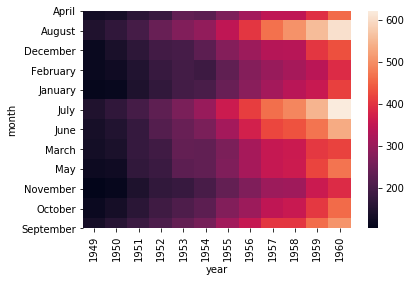

In [12]:
sns.heatmap(flight_dframe)

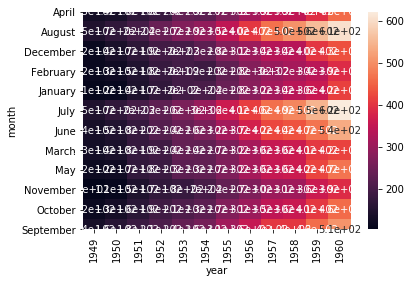

In [13]:
sns.heatmap(flight_dframe, annot = True)
# annot = annotation

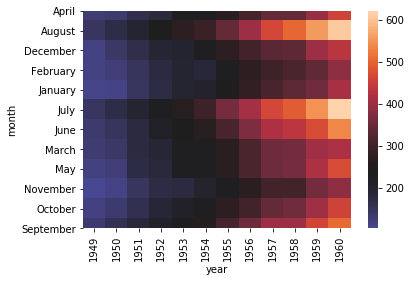

In [29]:
sns.heatmap(flight_dframe, center = flight_dframe.loc['January', 1955])

In [34]:
flight_dframe.sum().head()

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
dtype: int64

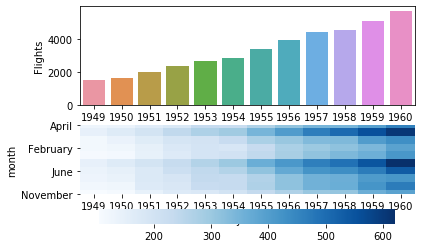

In [37]:
f,(axis1, axis2) = plt.subplots(2,1) 
# 2 rows, 1 col
# plt.subplots(): https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplot.html
# plt.subplot(nrows, ncols, index, **kwargs)

yearly_flights = flight_dframe.sum()

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years, flights), axis = 1)
year_dframe.columns = ['Year', 'Flights']

sns.barplot('Year', y = 'Flights', data = year_dframe, ax = axis1)
sns.heatmap(flight_dframe, cmap = 'Blues', ax = axis2, cbar_kws={'orientation': 'horizontal'})

In [35]:
year_dframe.head()

,Year,Flights
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700


#### Clustered Map

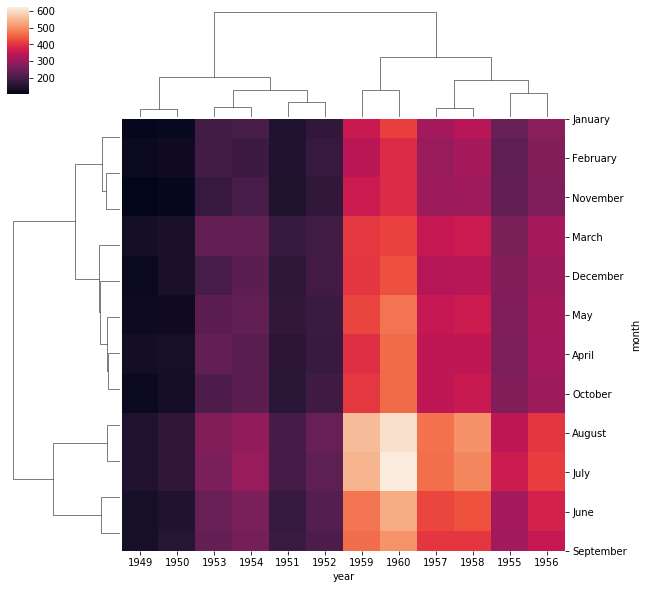

In [40]:
# reformat of heatmap

sns.clustermap(flight_dframe)

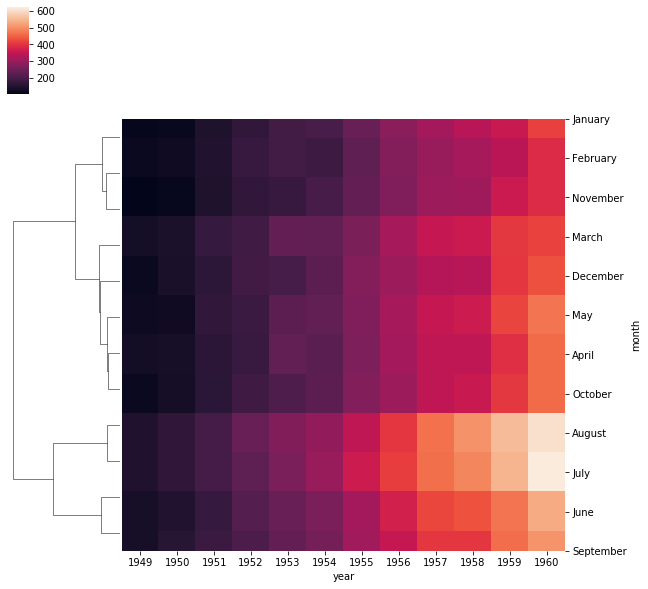

In [42]:
sns.clustermap(flight_dframe, col_cluster = False)
# clustered by month

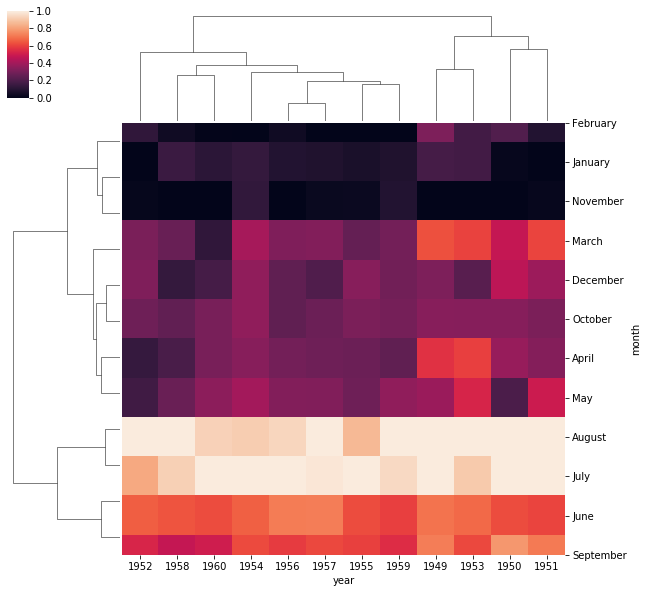

In [45]:
sns.clustermap(flight_dframe, standard_scale = 1)
# col

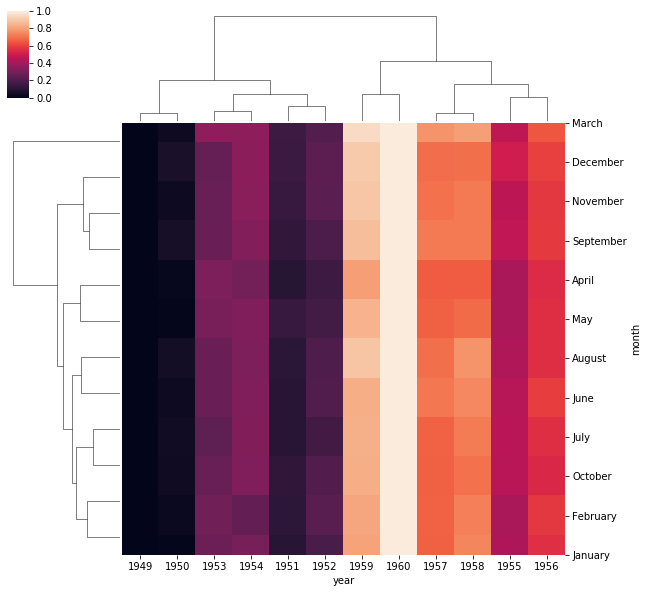

In [46]:
sns.clustermap(flight_dframe, standard_scale = 0)
# row

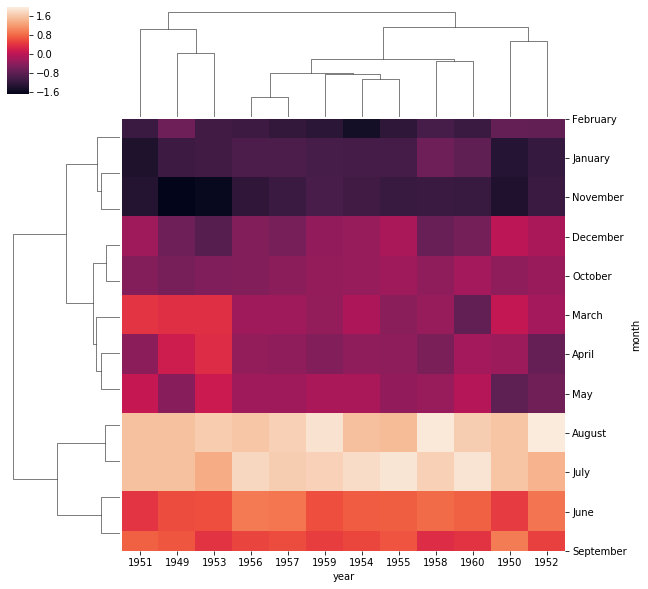

In [47]:
sns.clustermap(flight_dframe, z_score = 1)